In [ ]:
!python --version

Python 3.7.13


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Project/Adults_NHANES_2011_2012.csv")

In [ ]:
print(df.columns)

Index(['seqn', 'gender', 'age', 'race', 'education', 'marital', 'income',
       'household_size', 'insurance', 'private_insur', 'medicare', 'medicaid',
       'military_insur', 'no_insurance', 'gen_health', 'fam_savings', 'asthma',
       'memory', 'chf', 'cad', 'mi', 'cva', 'copd', 'cancer', 'diabetes',
       'depression', 'hypertension', 'smoker', 'days_active', 'drinks_day',
       'weight_kg', 'height_cm', 'bmi', 'waist_cm', 'pulse', 'sys_bp',
       'dia_bp', 'drugs', 'alb_cr_ratio', 'alb', 'alt', 'ast', 'alk_phos',
       'bun', 'ca', 'cpk', 't_chol', 'bicarb', 'cr', 'glucose', 'iron', 'ldh',
       'phos', 't_bilirubin', 't_protein', 'u_acid', 'sodium', 'potassium',
       'chloride', 'glob', 'trigs', 'wbc', 'hgb', 'hct', 'platelets',
       's_cotinine', 'a1c', 'glucose.1', 'insulin', 'hdl', 'ldl_chol',
       'grip_strength', 'fvc', 'fev1', 'fev1_fvc_ratio'],
      dtype='object')


In [ ]:
print(df.head)

<bound method NDFrame.head of        seqn  gender  age  race  education  marital  income  household_size  \
0     69220       1   21     7        2.0      6.0     1.0               2   
1     63030       0   21     1        2.0      6.0     3.0               4   
2     64051       0   21     2        3.0      5.0     4.0               3   
3     65141       0   21     1        2.0      5.0     4.0               4   
4     64632       0   21     2        3.0      5.0    10.0               2   
...     ...     ...  ...   ...        ...      ...     ...             ...   
5201  65395       0   77     7        5.0      5.0     2.0               1   
5202  67107       0   77     4        3.0      3.0     2.0               1   
5203  67412       0   77     3        4.0      1.0     4.0               2   
5204  67414       1   77     4        2.0      2.0     3.0               1   
5205  68482       1   77     4        3.0      2.0     3.0               3   

      insurance  private_insur  .

In [ ]:
df = df[['gender', 'age', 'race', 'bmi', 'sys_bp', 'dia_bp', 't_chol', 'glucose', 't_bilirubin', 'a1c']]

In [ ]:
print(len(df))

5206


In [ ]:
df.dropna(subset=['a1c'], inplace=True)

In [ ]:
def DBA(x):

  if x >= 6.5:
    return 0
  elif x >= 5.7 and x<=6.4:
    return 1
  elif x < 5.7:
    return 2

In [ ]:
def DB(x):

  if x >= 6.5:
    return 0
  elif x >= 5.7 and x<=6.4:
    return 0
  elif x < 5.7:
    return 1

In [ ]:
def HT(x, y):

  if x < 120 and y < 80:
    return 0
  elif (120 < x < 129) and (y < 80):
    return 1
  elif (130 < x < 139) or (80 < y < 89):
    return 1
  elif x >= 140 or y >=90:
    return 1
  elif x >180 or y >120:
    return 1

In [ ]:
def BL(x):

  if x <= 1.2:
    return 0
  elif x > 1.2:
    return 1

In [ ]:
df['diabetic'] = pd.Series()
df['hypertensic'] = pd.Series()
#df['bilirubin_level'] = pd.Series()
#df['diab'] = pd.Series()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
df.reset_index(inplace=True, drop=True)
print(len(df))

4916


In [ ]:
df['diabetic'] = df['a1c'].apply(DB)
df['bilirubin_level'] = df['t_bilirubin'].apply(BL)

In [ ]:
for i in range(0,len(df)):
  x = df['sys_bp'][i]
  y = df['dia_bp'][i]

  df['hypertensic'][i] = HT(x,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df.dropna(subset=['hypertensic'], inplace=True)

In [ ]:
df = df.dropna(axis = 0)

In [ ]:
df.reset_index(inplace=True, drop=True)
print(len(df))

3937


In [ ]:
!pip install causalnex

     |████████████████████████████████| 154 kB 4.3 MB/s 
     |████████████████████████████████| 1.9 MB 50.8 MB/s 
     |████████████████████████████████| 22.3 MB 1.8 MB/s 
     |████████████████████████████████| 81 kB 8.5 MB/s 
     |████████████████████████████████| 65 kB 3.0 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68719 sha256=722502d6390cf527af38bb3c32cea6ebfbe15b768988ea024b3b58d7625597a2
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.14.0
    Uninstalling wrapt-1.14.0:
      Successfully uninstalled wrapt-1.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are 

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz
import pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 41 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail18 amd64 2.24.32-1ubuntu1 [14.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail-common amd64 2.24.32

In [ ]:
import pygraphviz

In [ ]:
import warnings
from causalnex.structure import StructureModel

warnings.filterwarnings("ignore")  # silence warnings

sm = StructureModel()

In [ ]:
print(df.head)

<bound method NDFrame.head of       gender  age  race   bmi  sys_bp  dia_bp  t_chol  glucose  t_bilirubin  \
0          1   21     7  18.2    96.0    50.0   118.0     82.0          0.8   
1          0   21     1  25.9   110.0    60.0   172.0     81.0          1.2   
2          0   21     2  29.5   114.0    72.0   168.0     87.0          0.4   
3          0   21     1  17.9   108.0    62.0   144.0     91.0          0.9   
4          0   21     2  30.6   134.0    64.0   104.0     89.0          0.8   
...      ...  ...   ...   ...     ...     ...     ...      ...          ...   
3932       1   77     3  32.4   140.0    68.0   182.0    116.0          0.6   
3933       1   77     1  30.6   136.0    56.0   176.0    175.0          0.5   
3934       0   77     3  39.2   136.0    62.0   197.0    101.0          0.6   
3935       1   77     4  36.5   128.0    74.0   181.0    103.0          1.0   
3936       1   77     4  34.8   150.0    78.0   223.0     93.0          0.5   

      a1c  diabetic  

In [ ]:
from causalnex.structure.notears import from_pandas

sm = from_pandas(df)

In [ ]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

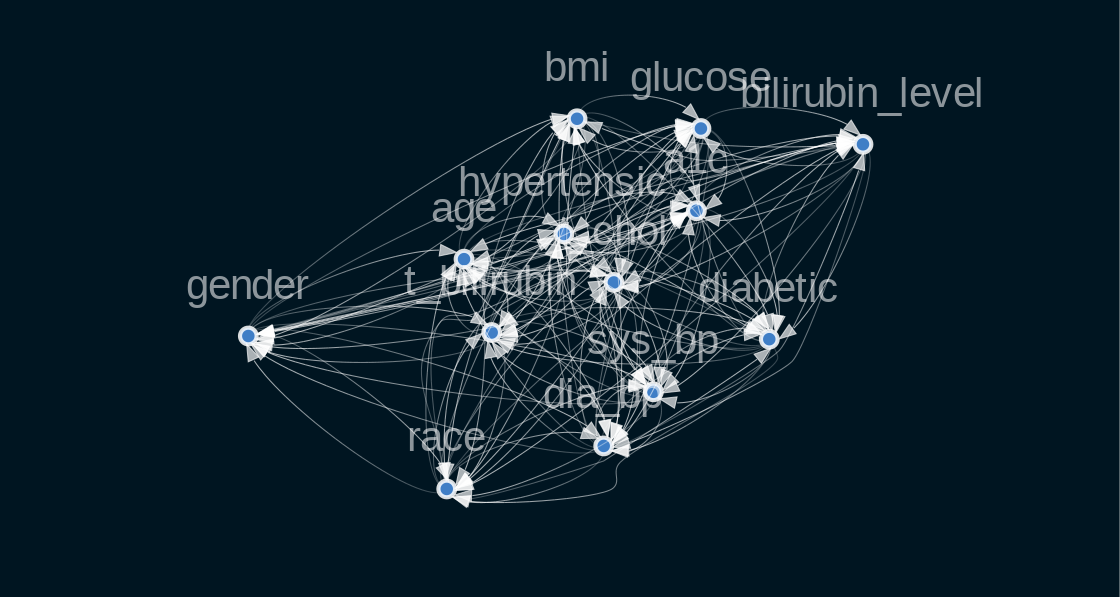

In [ ]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.9"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    prog='fdp',
)
Image(viz.draw(format='png'))

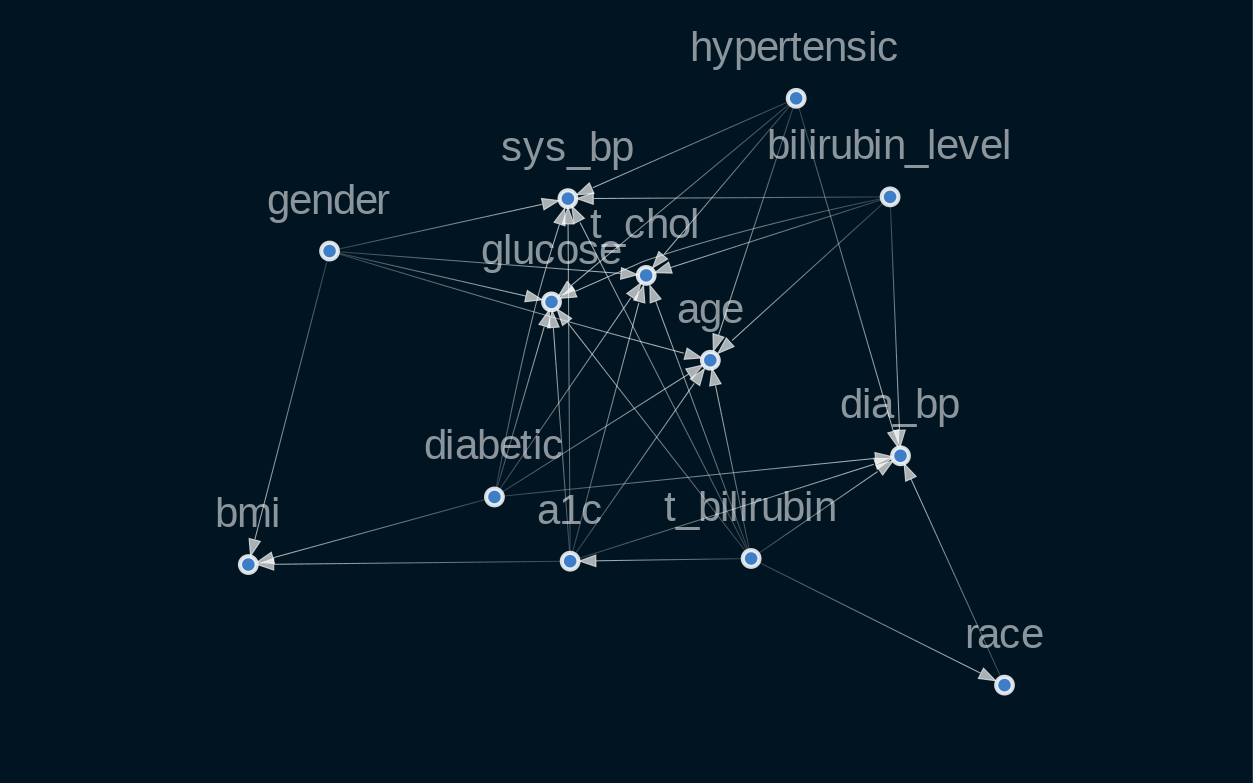

In [ ]:
sm.remove_edges_below_threshold(1.5)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.9"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

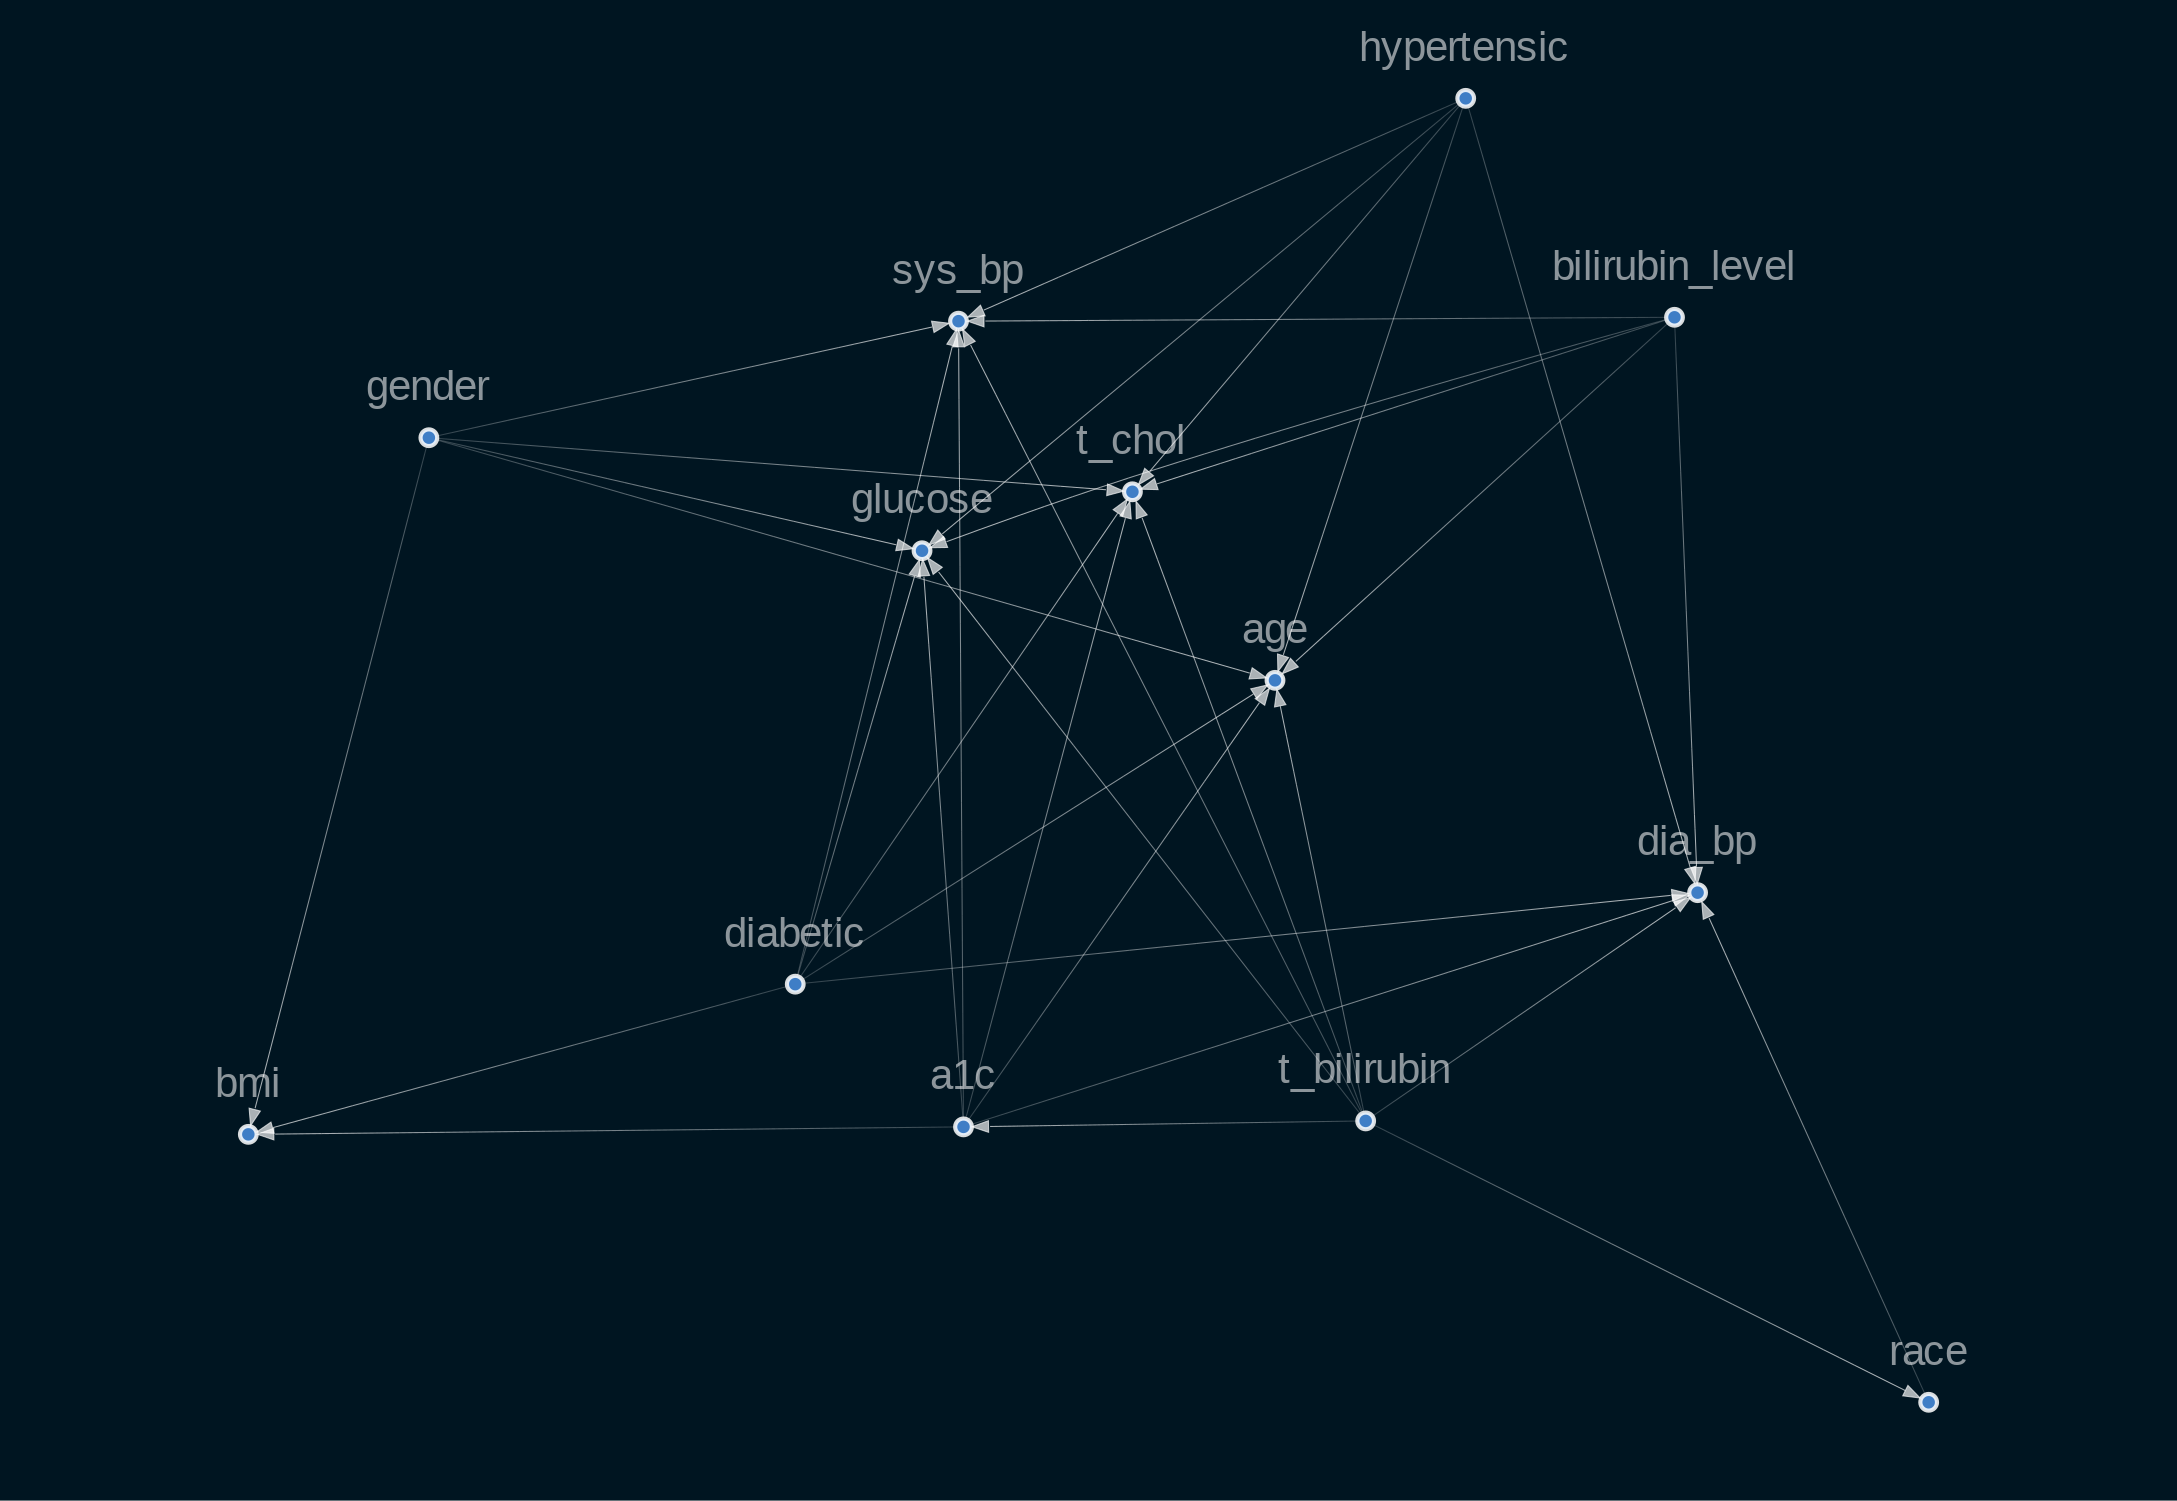

In [ ]:
sm = sm.get_largest_subgraph()
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2.0"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [ ]:
import networkx as nx

nx.drawing.nx_pydot.write_dot(sm, 'diabetes_causal_graph.dot')

In [ ]:
from causalnex.network import BayesianNetwork

bn = BayesianNetwork(sm)

In [ ]:
'''discretised_df = df.copy()

df_vals = {col: df[col].unique() for col in df.columns}

diabetes_map = {v: 'no-diabetes' if v == [0]
                else 'have-diabetes' for v in df_vals['diabetic']}
hypertension_map = {v: 'no_hypertension' if v in [0]
                 else 'have_hypertension' for v in df_vals['hypertensic']}'''

In [ ]:
'''discretised_df["diabetic"] = discretised_df["diabetic"].map(diabetes_map)
discretised_df["hypertensic"] = discretised_df["hypertensic"].map(hypertension_map)'''

In [ ]:
# Split 90% train and 10% test
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.9, test_size=0.1, random_state=7)

In [ ]:
bn = bn.fit_node_states(df)

In [ ]:

bn = bn.fit_cpds(train, method="BayesianEstimator", bayes_prior="K2")

In [ ]:
bn.cpds[ "diabetic"]

,
diabetic,
0,0.41213
1,0.58787


In [ ]:
df.loc[45, df.columns != 'diabetic']

gender               1.0
age                 21.0
race                 4.0
bmi                 30.2
sys_bp             112.0
dia_bp              64.0
t_chol             212.0
glucose             97.0
t_bilirubin          0.6
a1c                  5.2
hypertensic          0.0
bilirubin_level      0.0
Name: 45, dtype: float64

In [ ]:
from causalnex.evaluation import classification_report

classification_report(bn, test, "diabetic")

{'accuracy': 0.5786802030456852,
 'diabetic_0': {'f1-score': 0.0,
  'precision': 0.0,
  'recall': 0.0,
  'support': 166},
 'diabetic_1': {'f1-score': 0.7331189710610932,
  'precision': 0.5786802030456852,
  'recall': 1.0,
  'support': 228},
 'macro avg': {'f1-score': 0.3665594855305466,
  'precision': 0.2893401015228426,
  'recall': 0.5,
  'support': 394},
 'weighted avg': {'f1-score': 0.4242414350302773,
  'precision': 0.3348707773969955,
  'recall': 0.5786802030456852,
  'support': 394}}

In [ ]:

print(f"The ground truth is '{df.loc[18, 'diabetic']}'")

The ground truth is '1'


In [ ]:
from causalnex.evaluation import classification_report

classification_report(bn, test, "diabetic")

{'accuracy': 0.5786802030456852,
 'diabetic_0': {'f1-score': 0.0,
  'precision': 0.0,
  'recall': 0.0,
  'support': 166},
 'diabetic_1': {'f1-score': 0.7331189710610932,
  'precision': 0.5786802030456852,
  'recall': 1.0,
  'support': 228},
 'macro avg': {'f1-score': 0.3665594855305466,
  'precision': 0.2893401015228426,
  'recall': 0.5,
  'support': 394},
 'weighted avg': {'f1-score': 0.4242414350302773,
  'precision': 0.3348707773969955,
  'recall': 0.5786802030456852,
  'support': 394}}

In [ ]:
from causalnex.evaluation import roc_auc
roc, auc = roc_auc(bn, test, "diabetic")
print(auc)

0.5786802030456852


In [ ]:
import warnings
from causalnex.structure import StructureModel

warnings.filterwarnings("ignore")  # silence warnings

sm_self = StructureModel()

In [ ]:
sm_self.add_edges_from([
    ('bmi', 'diabetic'),
    ('bmi', 'dia_bp'),
    ('t_chol', 'dia_bp'),
    ('t_chol', 'diabetic'),
    ('dia_bp', 'diabetic')

])

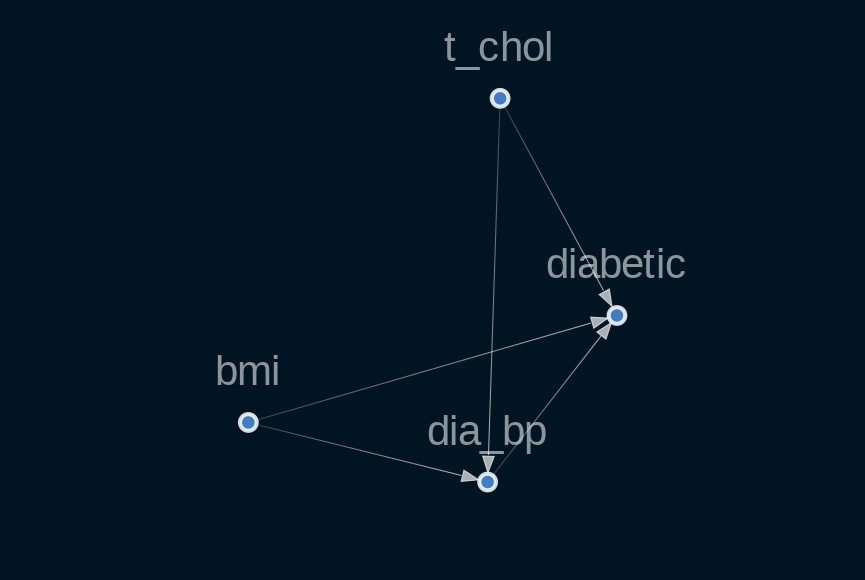

In [ ]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

viz = plot_structure(
    sm_self,
    graph_attributes={"scale": "1.0"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [ ]:
import networkx as nx

nx.drawing.nx_pydot.write_dot(sm_self, 'self_diab_causal_graph5.dot')

In [ ]:
from causalnex.network import BayesianNetwork

bn_self = BayesianNetwork(sm_self)

In [ ]:
# Split 90% train and 10% test
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.9, test_size=0.1, random_state=7)

In [ ]:
bn_self = bn_self.fit_node_states(df)

In [ ]:
bn_self = bn_self.fit_cpds(train, method="BayesianEstimator", bayes_prior="K2")

In [ ]:
df.loc[18, df.columns != 'diabetic']

gender                1.000000
age                  21.000000
race                  3.000000
bmi                  19.800000
sys_bp              116.000000
dia_bp               72.000000
t_chol              153.000000
glucose              83.000000
t_bilirubin           0.700000
a1c                   4.900000
bilirubin_level       0.000000
hypertensic           0.000000
propensity_score      0.410713
Name: 18, dtype: float64

In [ ]:
print(df.columns)

Index(['gender', 'age', 'race', 'bmi', 'sys_bp', 'dia_bp', 't_chol', 'glucose',
       't_bilirubin', 'a1c', 'diabetic', 'bilirubin_level', 'hypertensic',
       'propensity_score'],
      dtype='object')


In [ ]:
predictions = bn_self.predict(df, "diabetic")

In [ ]:
from causalnex.evaluation import classification_report

classification_report(bn_self, test, "diabetic")

{'accuracy': 0.4213197969543147,
 'diabetic_0': {'f1-score': 0.5913978494623655,
  'precision': 0.42091836734693877,
  'recall': 0.9939759036144579,
  'support': 166},
 'diabetic_1': {'f1-score': 0.008695652173913044,
  'precision': 0.5,
  'recall': 0.0043859649122807015,
  'support': 228},
 'macro avg': {'f1-score': 0.30004675081813925,
  'precision': 0.4604591836734694,
  'recall': 0.4991809342633693,
  'support': 394},
 'weighted avg': {'f1-score': 0.2541996236203169,
  'precision': 0.46668134258779653,
  'recall': 0.4213197969543147,
  'support': 394}}

In [ ]:
from causalnex.evaluation import roc_auc
roc, auc = roc_auc(bn_self, test, "diabetic")
print(auc)

0.5


In [ ]:
## DoWhy Causal Analysis

In [ ]:
!pip install dowhy

In [ ]:
from dowhy import CausalModel

In [ ]:
# I. Create a causal model from the data and given graph.
model = CausalModel(
    data=df,
    treatment="hypertensic",
    outcome="a1c",
    common_causes="bmi, t_chol",
    graph='/content/self_diab_causal_graph4.dot')

# II. Identify causal effect and return target estimands
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

# III. Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")


In [ ]:
causal_estimate_match = model.estimate_effect(identified_estimand,
                                              method_name="backdoor.propensity_score_matching",
                                              target_units="atc")
print(causal_estimate_match)
print("Causal Estimate is " + str(causal_estimate_match.value))

propensity_score_matching


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                         
──────────────(Expectation(diabetic|bmi,t_chol))
d[hypertensic]                                  
Estimand assumption 1, Unconfoundedness: If U→{hypertensic} and U→diabetic then P(diabetic|hypertensic,bmi,t_chol,U) = P(diabetic|hypertensic,bmi,t_chol)

## Realized estimand
b: diabetic~hypertensic+bmi+t_chol
Target units: atc

## Estimate
Mean value: -0.21400113830392714

Causal Estimate is -0.21400113830392714


In [ ]:
print("Causal Estimate is " + str(estimate.value))

Causal Estimate is 0.2936245872491742
